In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Cargar dataset manualmente
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
           "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
X = pd.DataFrame(data, columns=columns)
y = pd.Series(target, name="MEDV")
df = X.copy()
df["MEDV"] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Regresión lineal simple
X_simple_train = X_train[["RM"]]
X_simple_test = X_test[["RM"]]
model_simple = LinearRegression()
model_simple.fit(X_simple_train, y_train)
y_pred_simple = model_simple.predict(X_simple_test)

In [11]:
# Regresión lineal múltiple
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)

In [12]:
# Árbol de regresión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [13]:
# Métricas de evaluación
results = pd.DataFrame({
    "Modelo": ["Lineal Simple", "Lineal Múltiple", "Árbol de Regresión"],
    "MSE": [
        mean_squared_error(y_test, y_pred_simple),
        mean_squared_error(y_test, y_pred_multiple),
        mean_squared_error(y_test, y_pred_tree)
    ],
    "R2": [
        r2_score(y_test, y_pred_simple),
        r2_score(y_test, y_pred_multiple),
        r2_score(y_test, y_pred_tree)
    ]
})
results

,Modelo,MSE,R2
0,Lineal Simple,46.144775,0.370757
1,Lineal Múltiple,24.291119,0.668759
2,Árbol de Regresión,10.416078,0.857963


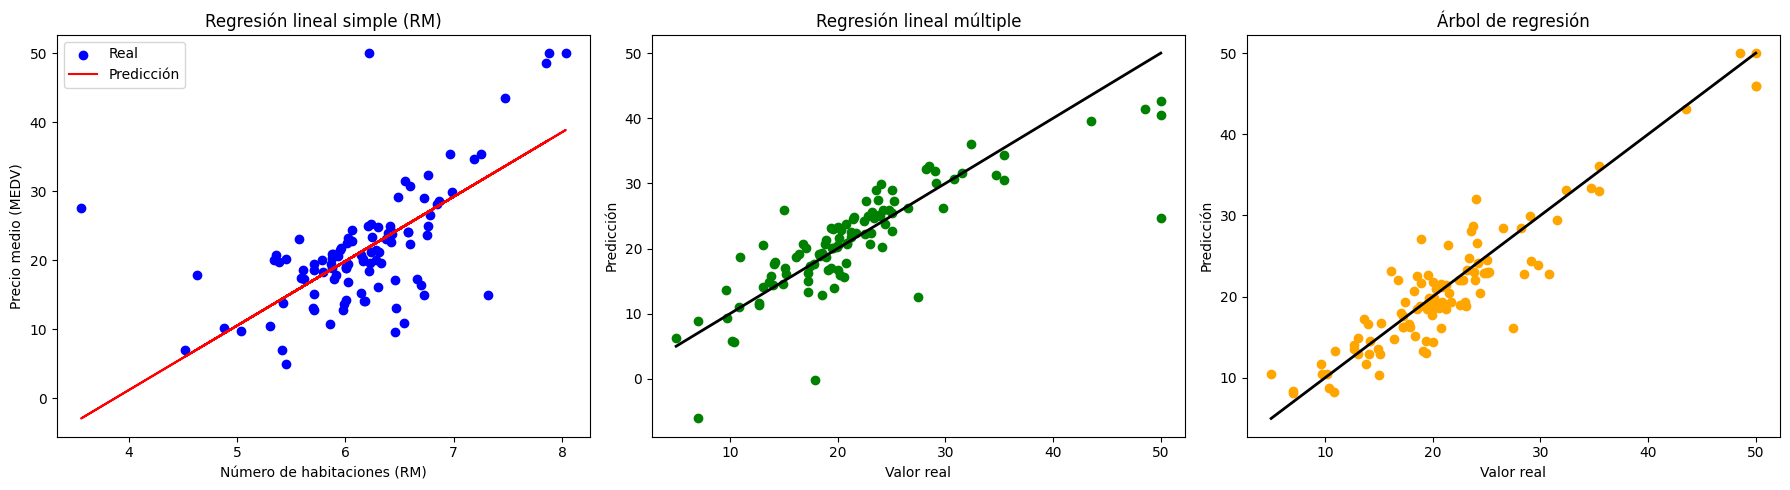

In [14]:
# Visualizaciones
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_simple_test, y_test, color='blue', label='Real')
axs[0].plot(X_simple_test, y_pred_simple, color='red', label='Predicción')
axs[0].set_title('Regresión lineal simple (RM)')
axs[0].set_xlabel('Número de habitaciones (RM)')
axs[0].set_ylabel('Precio medio (MEDV)')
axs[0].legend()

axs[1].scatter(y_test, y_pred_multiple, color='green')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2)
axs[1].set_title('Regresión lineal múltiple')
axs[1].set_xlabel('Valor real')
axs[1].set_ylabel('Predicción')

axs[2].scatter(y_test, y_pred_tree, color='orange')
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2)
axs[2].set_title('Árbol de regresión')
axs[2].set_xlabel('Valor real')
axs[2].set_ylabel('Predicción')

plt.tight_layout()
plt.show()

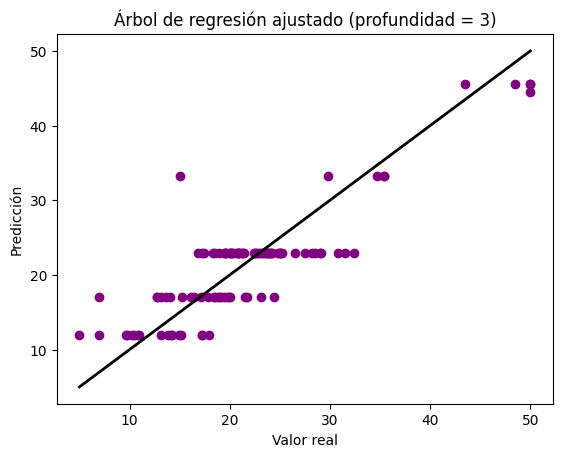

In [17]:
# Árbol de regresión ajustado con profundidad limitada
tree_limited = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_limited.fit(X_train, y_train)
y_pred_limited = tree_limited.predict(X_test)

# Métricas del árbol ajustado
mse_limited = mean_squared_error(y_test, y_pred_limited)
r2_limited = r2_score(y_test, y_pred_limited)

plt.scatter(y_test, y_pred_limited, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2)
plt.title('Árbol de regresión ajustado (profundidad = 3)')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.show()
